# Colored Model
This notebook contains the model trained on the colored dataset.

In [1]:
from fastbook import *
from fastai.vision.all import *

def _plot_top_losses(self, k, largest=True, **kwargs):
    losses,idx = self.top_losses(k, largest)
    if not isinstance(self.inputs, tuple): self.inputs = (self.inputs,)
    if isinstance(self.inputs[0], Tensor): inps = tuple(o[idx] for o in self.inputs)
    else: inps = self.dl.create_batch(self.dl.before_batch([tuple(o[i] for o in self.inputs) for i in idx]))
    b = inps + tuple(o[idx] for o in (self.targs if is_listy(self.targs) else (self.targs,)))
    x,y,its = self.dl._pre_show_batch(b, max_n=k)
    b_out = inps + tuple(o[idx] for o in (self.decoded if is_listy(self.decoded) else (self.decoded,)))
    x1,y1,outs = self.dl._pre_show_batch(b_out, max_n=k)
    if its is not None:
        plot_top_losses(x, y, its, outs.itemgot(slice(len(inps), None)), self.preds[idx], losses, **kwargs)
ClassificationInterpretation.plot_top_losses = _plot_top_losses

In [2]:
path = '/home/cp47/CS344FinalProject/data/colored-big'

In [3]:
dblock = DataBlock(blocks=(ImageBlock(cls=PILImage), CategoryBlock),
                   get_items = get_image_files,
                   get_y = parent_label,
                   splitter= GrandparentSplitter(train_name='train', valid_name='test')
                  )

In [4]:
dsets = dblock.datasets(path)

In [15]:
dsets.train

(#28709) [(PILImage mode=RGB size=224x224, TensorCategory(0)),(PILImage mode=RGB size=224x224, TensorCategory(0)),(PILImage mode=RGB size=224x224, TensorCategory(0)),(PILImage mode=RGB size=224x224, TensorCategory(0)),(PILImage mode=RGB size=224x224, TensorCategory(0)),(PILImage mode=RGB size=224x224, TensorCategory(0)),(PILImage mode=RGB size=224x224, TensorCategory(0)),(PILImage mode=RGB size=224x224, TensorCategory(0)),(PILImage mode=RGB size=224x224, TensorCategory(0)),(PILImage mode=RGB size=224x224, TensorCategory(0))...]

In [16]:
dsets.valid

(#7178) [(PILImage mode=RGB size=224x224, TensorCategory(0)),(PILImage mode=RGB size=224x224, TensorCategory(0)),(PILImage mode=RGB size=224x224, TensorCategory(0)),(PILImage mode=RGB size=224x224, TensorCategory(0)),(PILImage mode=RGB size=224x224, TensorCategory(0)),(PILImage mode=RGB size=224x224, TensorCategory(0)),(PILImage mode=RGB size=224x224, TensorCategory(0)),(PILImage mode=RGB size=224x224, TensorCategory(0)),(PILImage mode=RGB size=224x224, TensorCategory(0)),(PILImage mode=RGB size=224x224, TensorCategory(0))...]

In [4]:
dls = dblock.dataloaders(path)

In [5]:
learn = cnn_learner(dls, vgg16_bn, loss_func=CrossEntropyLossFlat(), metrics=accuracy)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /scratch/cs344/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0012022644514217973)

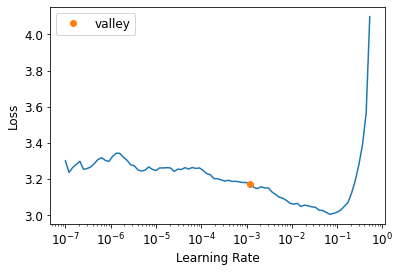

In [17]:
learn.lr_find()

In [6]:
learn.fine_tune(20, 0.002)

epoch,train_loss,valid_loss,accuracy,time
0,1.731513,1.485656,0.428671,05:16


epoch,train_loss,valid_loss,accuracy,time
0,1.260826,1.156721,0.560741,06:55
1,1.030544,1.056677,0.598635,06:55
2,0.795889,1.087984,0.607969,06:55
3,0.628016,1.192515,0.607412,06:55
4,0.437340,1.446723,0.611034,06:55
5,0.375792,1.495600,0.604765,06:55
6,0.288256,1.595832,0.602257,06:55
7,0.234003,1.702955,0.614935,06:55
8,0.177510,1.790488,0.618139,06:55
9,0.143697,1.867063,0.623154,06:55
